<a href="https://colab.research.google.com/github/yeonhas/bigdata/blob/main/BigData_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#드라이브 연결
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import os
print("before: %s"%os.getcwd())
os.chdir("/content/gdrive/My Drive/빅데이터/")
print("after: %s"%os.getcwd())

before: /content
after: /content/gdrive/My Drive/빅데이터


In [ ]:
#라이브러리 로딩
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.font_manager as fm
warnings.filterwarnings(action='ignore')

In [ ]:
#폰트설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq
path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()

NanumGothic


In [ ]:
df_car_cty = pd.read_csv('도심형화재발생현황(자동차_철도차량)_2021.csv')
df_car_cty.head()

,wrinvstg_no,fire_type_nm,trgtobj_nm,buld_srtfrm,buld_strctr,buld_srtrf,buld_strct_dong_cnt,ground_nof,bstory_cnt,totar,...,vhcle_mnfctur_entrps,fld_fire_se,fld_fire_ign_bhf,time_unit_tmprt,time_unit_rainqty,time_unit_ws,time_unit_wd,time_unit_humidity,time_unit_msnf,time_unit
0,210101124037891,자동차/철도차량,"k5(277모3074, 2012년식,LPG)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,기아,NaN,NaN,-1.9,NaN,1.1,140.0,69.0,1.9,2000.0
1,210105094818358,자동차/철도차량,차량(대우25톤장축카고트럭) 화재,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,타타대우상용차,NaN,NaN,2.9,NaN,1.5,90.0,50.0,NaN,1981.0
2,210106160925135,자동차/철도차량,프론티어 2.5톤 덤프트럭(95다7470),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,기아,NaN,NaN,0.0,NaN,2.1,250.0,45.0,NaN,4589.0
3,210113002126762,자동차/철도차량,에쿠스 차량화재,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,현대,NaN,NaN,1.7,NaN,1.8,160.0,71.0,3.8,1192.0
4,210118135555569,자동차/철도차량,GM스파크(차량),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,대우,NaN,NaN,5.7,NaN,7.4,290.0,48.0,1.6,1227.0


In [ ]:
df_car_frm=pd.read_csv('농촌형화재발생현황(자동차_철도차량_2021.csv')
df_car_frm.head()

,wrinvstg_no,fire_type_nm,trgtobj_nm,buld_srtfrm,buld_strctr,buld_srtrf,buld_strct_dong_cnt,ground_nof,bstory_cnt,totar,...,vhcle_mnfctur_entrps,fld_fire_se,fld_fire_ign_bhf,time_unit_tmprt,time_unit_rainqty,time_unit_ws,time_unit_wd,time_unit_humidity,time_unit_msnf,time_unit
0,210104123633254,자동차/철도차량,벤츠(47저8375),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,벤츠,NaN,NaN,-3.7,NaN,0.8,50.0,69.0,NaN,1628.0
1,210106141043260,자동차/철도차량,현대슈퍼트럭(25톤),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,현대,NaN,NaN,-3.9,NaN,1.6,360.0,61.0,NaN,2000.0
2,210108140323663,자동차/철도차량,대우25톤장축카고트럭,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,타타대우상용차,NaN,NaN,-14.9,NaN,0.7,180.0,69.0,3.9,1592.0
3,210109015403097,자동차/철도차량,대우 11.5톤 카고 트럭,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,타타대우상용차,NaN,NaN,-17.1,NaN,0.2,0.0,84.0,3.5,1925.0
4,210112202132262,자동차/철도차량,차량(현대/그랜저TG),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,현대,NaN,NaN,0.5,NaN,2.1,180.0,94.0,10.3,533.0


###도시형 데이터와 농촌형 데이터 융합

1.   데이터 융합 : concat
2.   데이터 전처리(df[['column_name']])



In [ ]:
df = pd.concat([df_car_cty, df_car_frm])

In [ ]:
df_car = df[['wrinvstg_no', 'fire_type_nm', 'trgtobj_nm', 'fire_ocrn_yr', 'season_se_nm', 'fire_ocrn_ymd', 'fire_ocrn_mnth', 'dsp_reqre_time','sido_nm', 'sigungu_nm', 'emd_nm', 'cty_frmvl_se_nm', 'ign_htsrc_sclas_nm', 'ign_fctr_lclas_nm', 'eco_vhcle_cl_nm', 'vhcle_place', 'vhcle_ign_bhf', 'time_unit_tmprt', 'time_unit_rainqty', 'time_unit_humidity' ]]

In [ ]:
df_car.head()

,wrinvstg_no,fire_type_nm,trgtobj_nm,fire_ocrn_yr,season_se_nm,fire_ocrn_ymd,fire_ocrn_mnth,dsp_reqre_time,sido_nm,sigungu_nm,emd_nm,cty_frmvl_se_nm,ign_htsrc_sclas_nm,ign_fctr_lclas_nm,eco_vhcle_cl_nm,vhcle_place,vhcle_ign_bhf,time_unit_tmprt,time_unit_rainqty,time_unit_humidity
0,210101124037891,자동차/철도차량,"k5(277모3074, 2012년식,LPG)",2021,겨울,20210101,1,800,전라북도,전주시 덕진구,중동,도시,마찰열/마찰 스파크,교통사고,NaN,일반도로,엔진룸,-1.9,NaN,69.0
1,210105094818358,자동차/철도차량,차량(대우25톤장축카고트럭) 화재,2021,겨울,20210104,1,546,전라북도,군산시,산북동,도시,마찰열/마찰 스파크,기계적 요인,NaN,일반도로,바퀴,2.9,NaN,50.0
2,210106160925135,자동차/철도차량,프론티어 2.5톤 덤프트럭(95다7470),2021,겨울,20210106,1,439,전라북도,남원시,화정동,도시,전기적 아크(단락),전기적 요인,NaN,공지,앞좌석,0.0,NaN,45.0
3,210113002126762,자동차/철도차량,에쿠스 차량화재,2021,겨울,20210112,1,240,전라북도,전주시 완산구,평화동2가,도시,기기 전도/복사열,기계적 요인,NaN,주차장,엔진룸,1.7,NaN,71.0
4,210118135555569,자동차/철도차량,GM스파크(차량),2021,겨울,20210118,1,248,전라북도,군산시,수송동,도시,불꽃/ 스파크/ 정전기,전기적 요인,NaN,일반도로,엔진룸,5.7,NaN,48.0


###columns값을 한글로 변경

In [ ]:
df_car.columns =  [ '조사서번호', '화재유형명', '대상물명', 
	'화재발생연도', '계절구분명', '화재발생일자', 
    '화재발생월', '출동소요시간', '시도명', '시군구명', '읍면동명',
    '도시농촌구분명', '발화열원명', '발화요인대분류명', 
    '친환경차량분류명', '차량장소', '차량발화지점', 
    '시간단위기온', '시간단위강수량', '시간단위습도' ]

In [ ]:
df_car.head()

,조사서번호,화재유형명,대상물명,화재발생연도,계절구분명,화재발생일자,화재발생월,출동소요시간,시도명,시군구명,읍면동명,도시농촌구분명,발화열원명,발화요인대분류명,친환경차량분류명,차량장소,차량발화지점,시간단위기온,시간단위강수량,시간단위습도
0,210101124037891,자동차/철도차량,"k5(277모3074, 2012년식,LPG)",2021,겨울,20210101,1,800,전라북도,전주시 덕진구,중동,도시,마찰열/마찰 스파크,교통사고,NaN,일반도로,엔진룸,-1.9,NaN,69.0
1,210105094818358,자동차/철도차량,차량(대우25톤장축카고트럭) 화재,2021,겨울,20210104,1,546,전라북도,군산시,산북동,도시,마찰열/마찰 스파크,기계적 요인,NaN,일반도로,바퀴,2.9,NaN,50.0
2,210106160925135,자동차/철도차량,프론티어 2.5톤 덤프트럭(95다7470),2021,겨울,20210106,1,439,전라북도,남원시,화정동,도시,전기적 아크(단락),전기적 요인,NaN,공지,앞좌석,0.0,NaN,45.0
3,210113002126762,자동차/철도차량,에쿠스 차량화재,2021,겨울,20210112,1,240,전라북도,전주시 완산구,평화동2가,도시,기기 전도/복사열,기계적 요인,NaN,주차장,엔진룸,1.7,NaN,71.0
4,210118135555569,자동차/철도차량,GM스파크(차량),2021,겨울,20210118,1,248,전라북도,군산시,수송동,도시,불꽃/ 스파크/ 정전기,전기적 요인,NaN,일반도로,엔진룸,5.7,NaN,48.0


In [ ]:
df_car['조사서번호'].count()

262

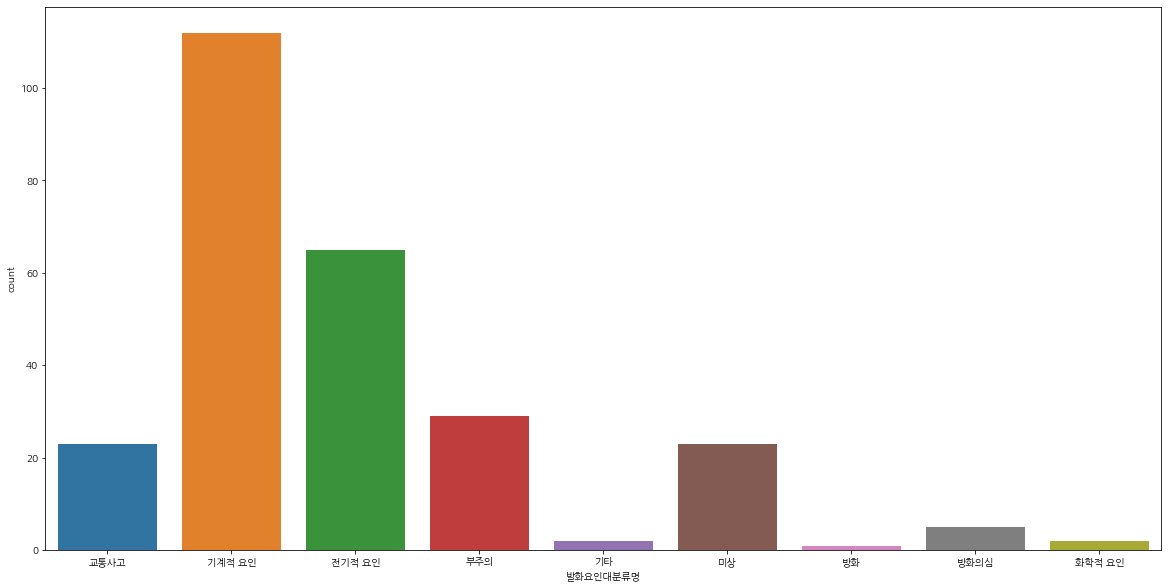

In [ ]:
# 발화요인 분석
plt.figure(figsize=(20, 10))
sns.countplot(x="발화요인대분류명", data=df_car)

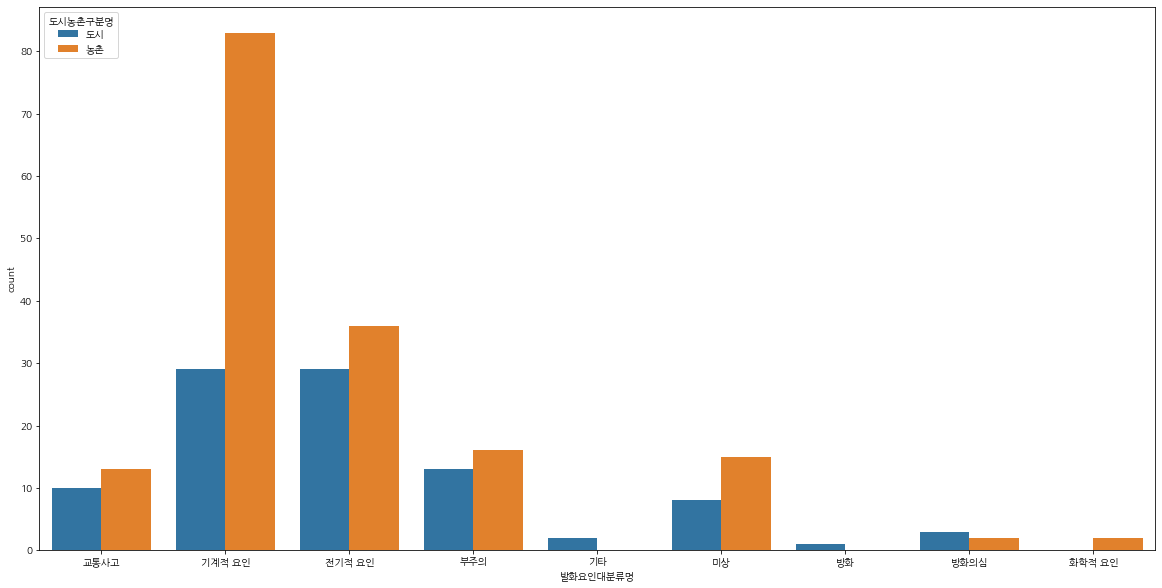

In [ ]:
#도시와 농촌으로 구분한 발화요인 분석
plt.figure(figsize=(20, 10))
sns.countplot(x="발화요인대분류명", hue='도시농촌구분명', data=df_car)

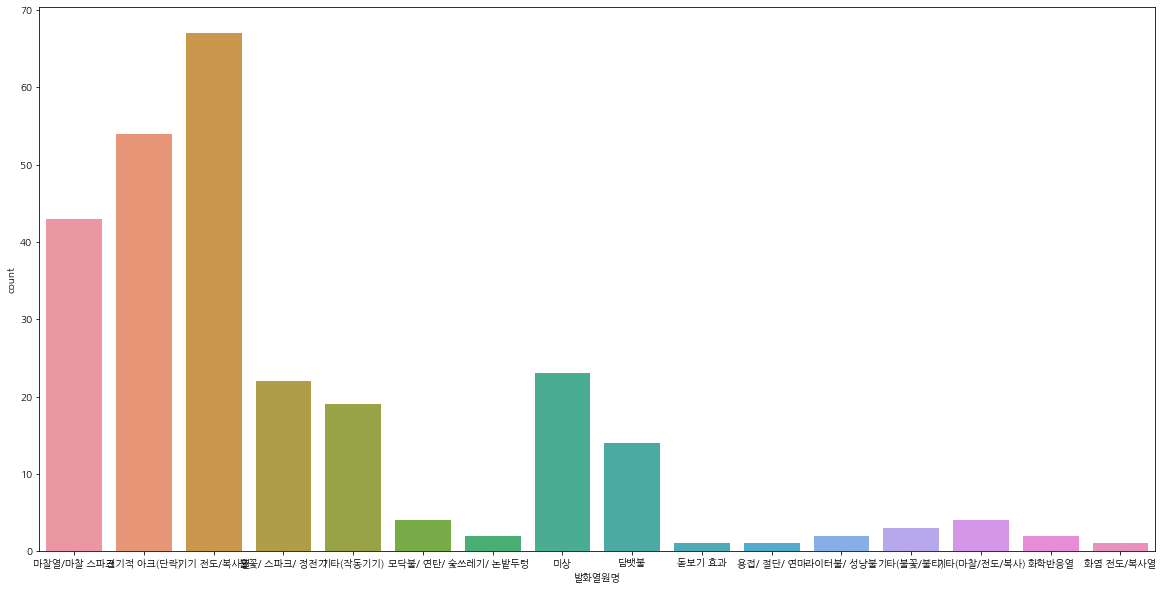

In [ ]:
#발화열원에 따른 분류
plt.figure(figsize=(20, 10))
sns.countplot(x="발화열원명", data=df_car)

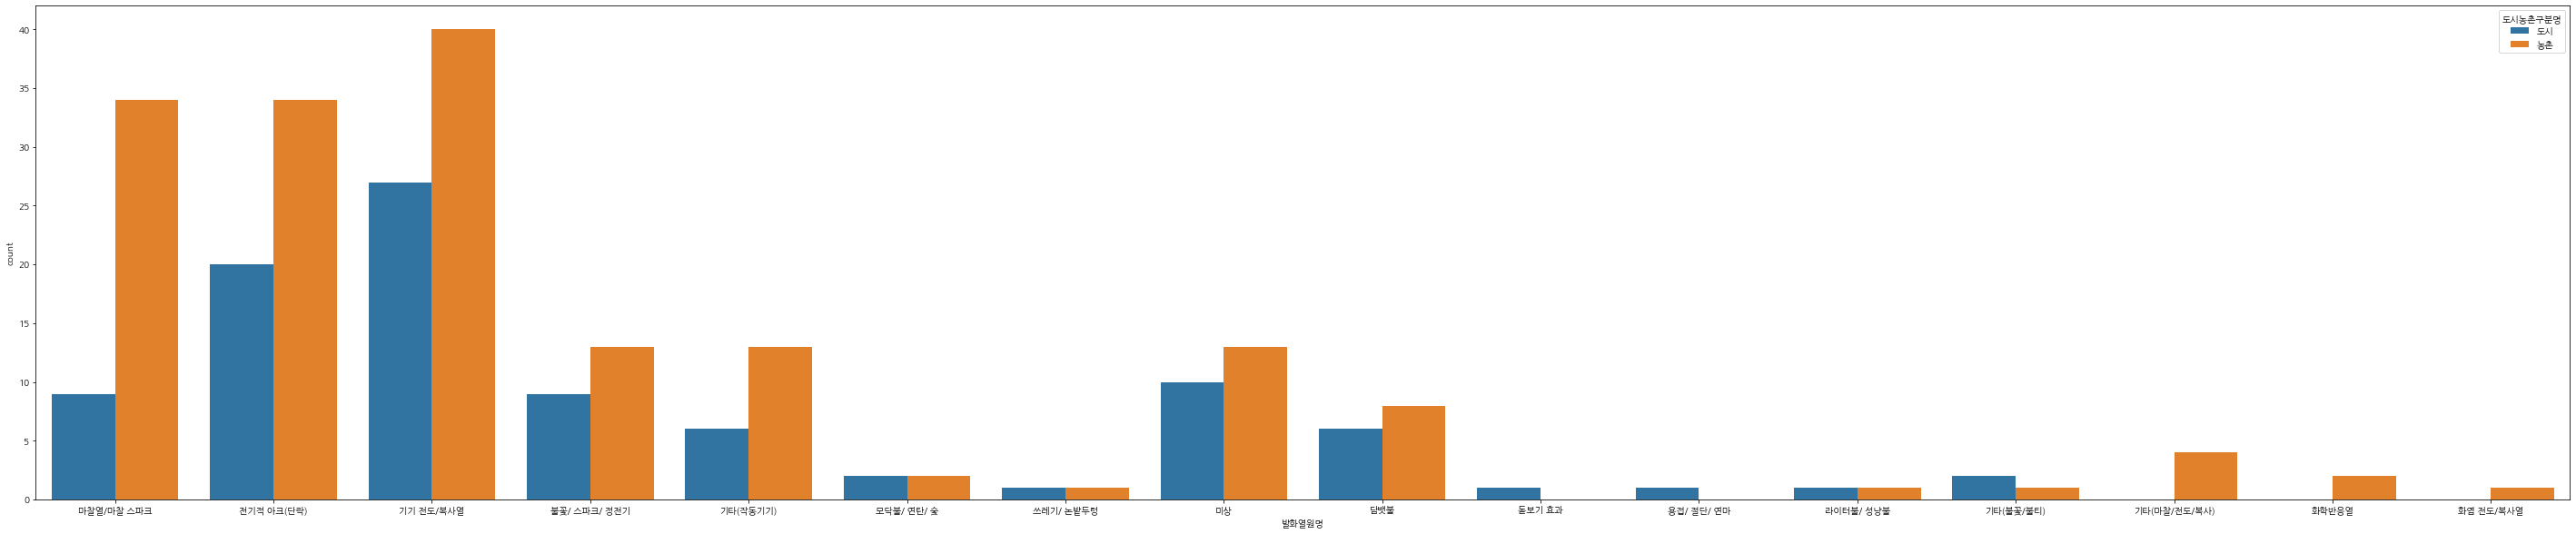

In [ ]:
#도시와 농촌으로 구분한 발화열원에 따른 분류
plt.figure(figsize=(50, 10))
sns.countplot(x="발화열원명", hue='도시농촌구분명', data=df_car)

In [ ]:
df_car['도시농촌구분명'].value_counts()

농촌    167
도시     95
Name: 도시농촌구분명, dtype: int64

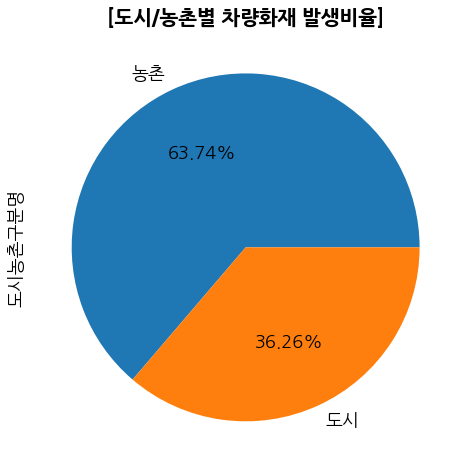

In [ ]:
df_type = df_car['도시농촌구분명'].value_counts()
plt.figure(figsize=(8, 8))
plt.rc('font', size=18 )
df_type.plot.pie(autopct='%.2f%%')
title_font = { 'fontsize':20, 'fontweight': 'bold'}
plt.title('[도시/농촌별 차량화재 발생비율]', fontdict=title_font)
plt.show()

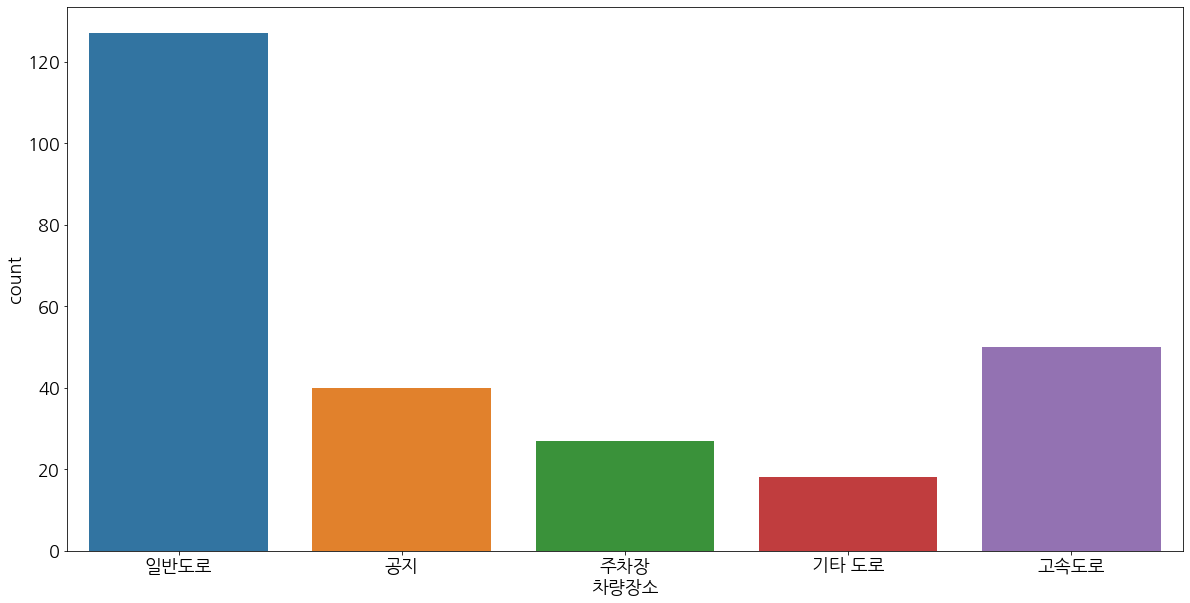

In [ ]:
#차량 화재 장소
plt.figure(figsize=(20,10))
sns.countplot(x="차량장소",  data=df_car)

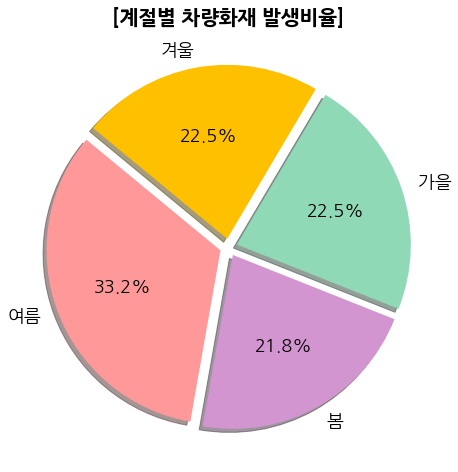

In [ ]:
ratio = df_car['계절구분명'].value_counts()
plt.figure(figsize=(8, 8))
labels = ['여름', '겨울', '가을', '봄']
explode = [0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
title_font = { 'fontsize':20, 'fontweight': 'bold' }
plt.title('[계절별 차량화재 발생비율]', fontdict=title_font)
plt.rc('font', size=18 )

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

## **Fail DATA**


> 실패한 데이터로, 외부에서 소스는 가져왔으나 알맞게 변경하지 못함.





In [ ]:
## seaborn으로 출동소요시간과 시군구에 따른 히트맵 분석?
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')

sns.heatmap(data=df_car, cmap='Pastel1')
plt.xticks(df_car['출동소요시간']) ## x축 눈금 생성
plt.yticks(df_car['시군구명']) ## y축 눈금 생성
plt.title('지역별 출동시간분석', fontsize=20)
 
plt.show()

In [ ]:
import folium as f

# Step1: 지도 불러오기
m = f.Map(location = [위도, 경도], zoom_start = 11)

f.Choropleth( )
# Step2: geo data에 자치구별 집계값 추가
for i in range(len(geo['features'])):
    SGG_close_values = temp2.reset_index()[temp2.reset_index()['소재지주소시군구'] == geo['features'][i]['properties']['SIG_KOR_NM']]['after'].values[0]
    SGG_pop_values = pop_final[pop_final['자치구'] == geo['features'][i]['properties']['SIG_KORNM']]['2020년06월총인구수'].values[0]
    geo['features'][i]['properties']['Close_rate'], geo['features'][i]['properties']['pop_total'] = SGG_close_values, SGG_pop_values

# Step3: 지도 시각화
choropleth = folium.Choropleth(
    geo_data = geo, # 지리 데이터
    data = temp2.reset_index(), # 정형 데이터 테이블
    columns = ['소재지주소시군구', 'after'], # 사용자 데이터 테이블에서 [조인할 key, 시각화 하고 싶은 데이터]
    key_on = 'feature.properties.SIG_KOR_NM', # 지리 데이터에서 조일할 'key'
    fill_color = 'YlOrRd', # 색 채우기
    fill_opacity = 0.5, # 색 투명도
    line_opacity = 0.5, # 선 투명도
    legend_name = '폐업률 비율', # 범례 제목
    Highlight = True, # 
    show = False,
    overlay = True,
).add_to(m)

# Step4: 지도 라벨링
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(
        fields = ['SIG_KOR_NM', 'Close_rate', 'pop_total'],
        aliases = ['자치구', '폐업률', '총인구수'])
    )

m

In [ ]:
from konlpy.tag import Okt
okt=Okt()
tokens_ko = okt.nouns(merge_text)
import nltk

from wordcloud import WordCloud
data = ko.vocab().most_common(100)

path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
wc=WordCloud(font_path=path,relative_scaling=0.2,background_color='white').generate_from_frequencies(dict(data))

plt.figure(figsize=(18,14))
plt.imshow(wc)
plt.axis('off')
plt.show()